<a href="https://colab.research.google.com/github/Pythonash/Kaggle-eng-/blob/Brain/Stochastic%20approach%20for%20NN_The%20short%20report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to my notebook

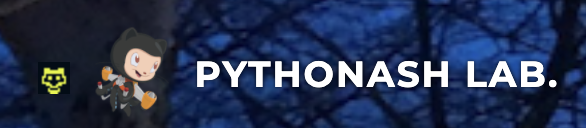

---

## Hi all, I revisit for sharing my experiences.

Now, I will inform you how you can optimize your deep-neural-network.

If you are using deep-neural-network which is fully connected model, it will be useful to you.

It contains 3 points.

### 1. I have trained my deep neural network model in several times.

- You can see how I changed and constructed the model in [my github notebbok](https://github.com/Pythonash/Kaggle-eng-/blob/Brain/Stochastic%20parameter%20finder.ipynb)

- In this procedure, I changed the parameters, the number of neurons, dropout rate, and learning rate, with randomness.

### 2. I identified the relationship between parameters and loss.

- I trained my model by changing the parameters and finally got the logs with fitting 15 hours.

- The logs contain the changed parameters, the number of neurons, dropout rate, learning rate for every iteration and every fold (with 5 folds).

### 3. I found that you don't need to use many neurons and learning rate.

---

Here, there are many chances to upgrade the model through handling hyper-parameter so that you can improve your score in leaderboard.

If you have any questions, please leave the comments.


## **Knowledge can be improved by being shared.**

Please upvote!!


## [You can learn more skills for handling dataset or neural network.]

- [End to end simple and powerful DNN with LeakyReLU](https://www.kaggle.com/pythonash/end-to-end-simple-and-powerful-dnn-with-leakyrelu) - **Ubiquant market prediction (gold medal)**

> [The korean version is here](https://www.kaggle.com/pythonash/leakyrelu)

- [Parallel DNN and CNN network for beginners](https://www.kaggle.com/pythonash/parallel-dnn-and-cnn-network-for-beginners) - **Pawpularity Contest (silver medal)**

- [Handling image and csv dataset at the same time](https://www.kaggle.com/pythonash/how-to-use-csv-and-img-at-the-same-time) - **Pawpularity Contest (bronze medal)**
 
- [Image data handling without memory exploded](https://www.kaggle.com/pythonash/how-to-handle-dataset-for-beginners) - **Pawpularity Contest (bronze medal)**

- [Data handling & Deep learning](https://www.kaggle.com/pythonash/how-to-handle-raw-dataset-and-analyze-with-dl) - **Titanic competition (best score!!, bronze medal)**

- [Deep learning model with SeLU activation function](https://www.kaggle.com/pythonash/selu-activation-function-in-dl) - **Titanic competition (bronze medal)**

- [Preparing a completed dataset with proper imputation method](https://www.kaggle.com/pythonash/making-completed-dataset) - **Titanic competition**
 
 
 
### [More contents or information]

## [Pythonash Github](https://github.com/pythonash)

## [Pythonash blog](https://pythonash.github.io/ash)

**Let's start!**

# Contents

<a id="toc"></a>
- [1. Import Library](#1)
- [2. Load dataset](#2)
- [3. Analysis for log data](#3)
- [4. Review](#4)

<a id="1"></a>
# Import library

In [1]:
!pip install pdpbox
import pandas as pd
import numpy as np
import pdpbox
import seaborn as sns
import statsmodels.api as sm
from pdpbox import info_plots

     |████████████████████████████████| 34.0 MB 205 kB/s 
     |████████████████████████████████| 13.1 MB 24.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=1ce91139d48c41333e631758caca3577887758ebc40017981a174dd87db68da4
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id="2"></a>
# Load dataset

- As I mentioned, this logs are gatherd from [my github notebbok](https://github.com/Pythonash/Kaggle-eng-/blob/Brain/Stochastic%20parameter%20finder.ipynb).

- I trained my model structure with many parameters which are assigned randomly for every iteration.

- And I applied the KFold strategy for identifying the result with robustness.

- The target is min_loss calculated after 5 epochs for each fold.

In [2]:
logs = pd.read_csv('/content/Parameter finder logs.csv')
logs

,num_iter,num_fold,neurons,drop_rate,lr_rate,min_loss
0,1,1,28,0.5,0.002475,0.832001
1,1,2,28,0.5,0.002475,0.835073
2,1,3,28,0.5,0.002475,0.839068
3,1,4,28,0.5,0.002475,0.834529
4,1,5,28,0.5,0.002475,0.832706
...,...,...,...,...,...,...
335,68,1,307,0.6,0.003893,0.839156
336,68,2,307,0.6,0.003893,0.835200
337,68,3,307,0.6,0.003893,0.838120
338,68,4,307,0.6,0.003893,0.837061


<a id="3"></a>
# Analysis for log data

The total case of simulations is 68.

So, we will look the distribution of each parameter with visualization.

## The neurons

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


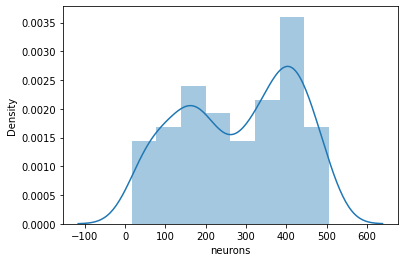

In [3]:
sns.distplot(logs['neurons'])

## The learning rates

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


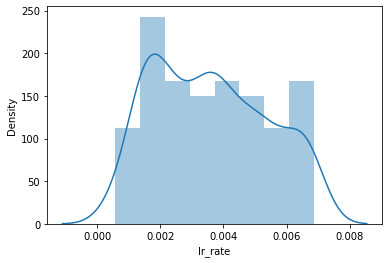

In [4]:
sns.distplot(logs['lr_rate'])

# The minimum loss after training with 5 epochs.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


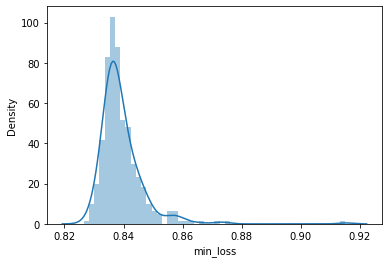

In [5]:
sns.distplot(logs['min_loss'])

## What is the best result? (Top 10)

In [6]:
logs.sort_values(['min_loss'], ascending=True)[:10]

,num_iter,num_fold,neurons,drop_rate,lr_rate,min_loss
265,54,1,93,0.1,0.002272,0.826476
56,12,2,286,0.4,0.005951,0.828751
210,43,1,121,0.6,0.002039,0.828879
289,58,5,204,0.2,0.002784,0.829241
302,61,3,159,0.5,0.001754,0.829553
200,41,1,185,0.3,0.001633,0.829696
319,64,5,160,0.2,0.001975,0.829836
327,66,3,339,0.1,0.001203,0.830069
138,28,4,369,0.3,0.003109,0.830485
208,42,4,80,0.4,0.001581,0.830538


## Now we will identify the result for each iteration.

- For each iteration, the best average score is 0.834343 when the neurons are 56, dropout rate is 0.6, and learning rate is 0.001418.

In [7]:
log_group = logs.groupby(['num_iter']).mean().sort_values(['min_loss'], ascending =  True)
log_group

,num_fold,neurons,drop_rate,lr_rate,min_loss
num_iter,,,,,
63,3.0,56.0,0.6,0.001418,0.834343
42,3.0,80.0,0.4,0.001581,0.834369
1,3.0,28.0,0.5,0.002475,0.834675
57,3.0,161.0,0.1,0.001554,0.834708
11,3.0,82.0,0.6,0.001445,0.834772
...,...,...,...,...,...
56,3.0,346.0,0.3,0.001916,0.845311
13,3.0,193.0,0.2,0.003913,0.845461
18,3.0,381.0,0.1,0.003112,0.846055


## We will check the effects of parameters through using linear regression.

If the coefficient is significant, it can say that yeah, it has any relationship with the loss result.

## Devide the log result into every loss result and loss result grouped by each iteration.

### - **logs**: is every loss result for every iteration and every fold.

### - **log_group**: is loss result grouped by each iteration.

## Coefficients of "logs" case.

As you can see, the coefficients are significant.

- If the neurons, dropout rate, and learning rate increased, the minimum loss tended to increase, too.

In [8]:
model1 = sm.OLS(logs['min_loss'], logs.drop(['num_iter','num_fold','min_loss'],axis=1)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               min_loss   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              1283.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                   5.89e-184
Time:                        11:42:56   Log-Likelihood:                          5.4559
No. Observations:                 340   AIC:                                     -4.912
Df Residuals:                     337   BIC:                                      6.575
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
neurons        0.0012    7.5e-05     16.134      0.000       0.001       0.001
drop_rate      0.9090      0.065     13.957      0.000       0.781       1.037
lr_rate       32.4041      7.778      4.166      0.000      17.105      47.703
==============================================================================
Omnibus:                        1.524   Durbin-Watson:                   0.376
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.390
Skew:                          -0.016   Prob(JB):                        0.499
Kurtosis:                       2.688   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Coefficients of "log_group" case.

As you can see, the coefficients are significant, but the learning rate is a little bit significant less than others.

- If the neurons, dropout rate, and learning rate increased, the minimum loss tended to increase, too.

In [9]:
model2 = sm.OLS(log_group['min_loss'], log_group.drop(['num_fold','min_loss'],axis=1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               min_loss   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              247.7
Date:                Mon, 07 Mar 2022   Prob (F-statistic):                    1.67e-35
Time:                        11:42:56   Log-Likelihood:                          1.1185
No. Observations:                  68   AIC:                                      3.763
Df Residuals:                      65   BIC:                                      10.42
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
neurons        0.0012      0.000      7.088      0.000       0.001       0.002
drop_rate      0.9090      0.148      6.132      0.000       0.613       1.205
lr_rate       32.4041     17.702      1.830      0.072      -2.950      67.758
==============================================================================
Omnibus:                        0.088   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.279
Skew:                          -0.014   Prob(JB):                        0.870
Kurtosis:                       2.688   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's figure out the relationship with pdpbox plot.

### **The case is "logs".**

This graph indicates the loss result about the bins of each parameter.

These results mean that the lower parameters are, the min_loss tends to decrease, too.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


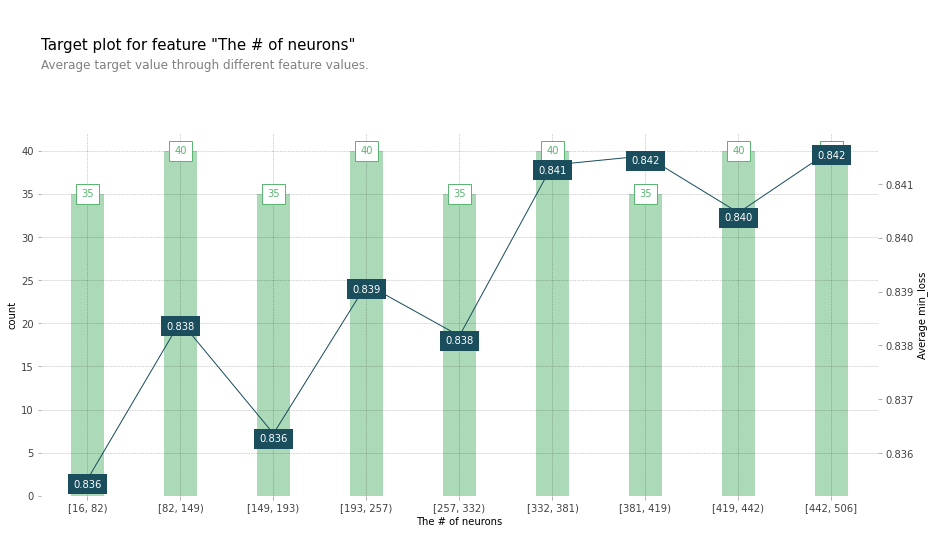

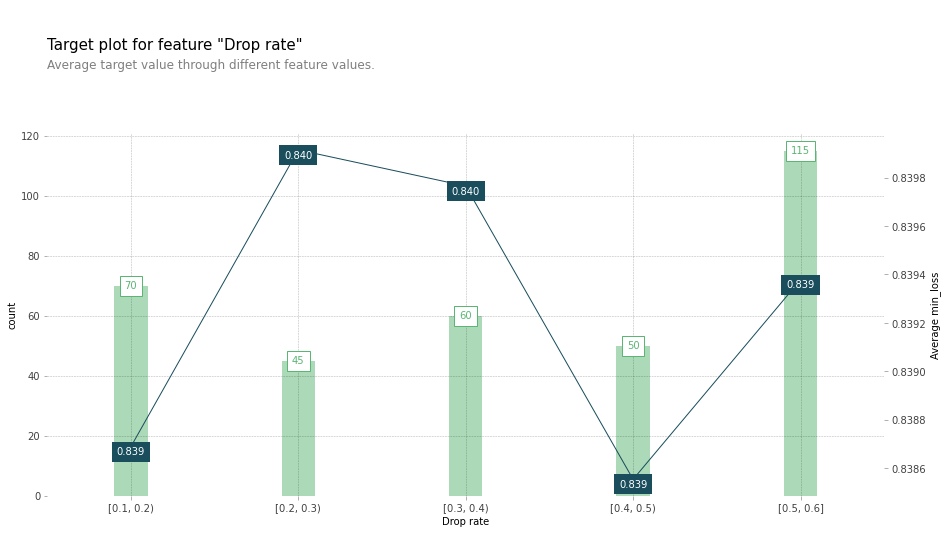

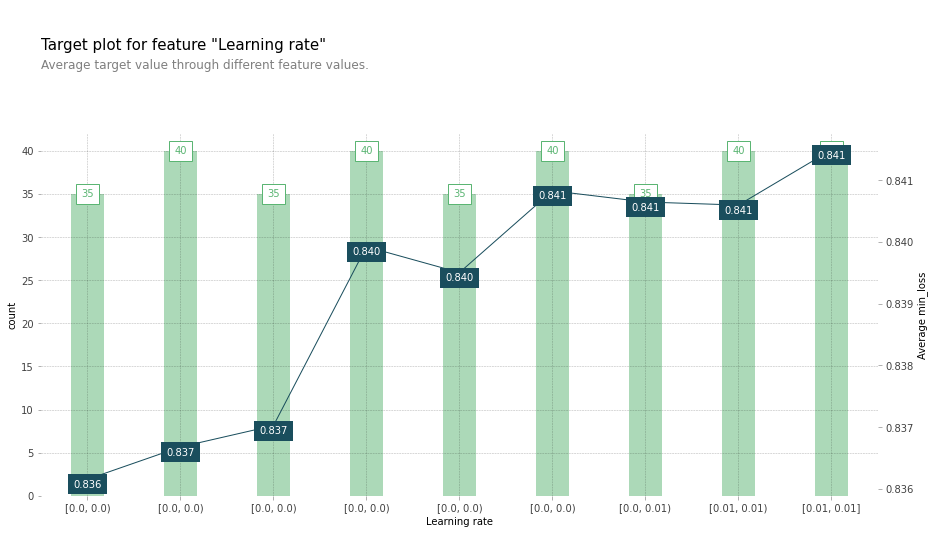

In [10]:
fig, axes, summary_df = info_plots.target_plot(
df = logs.drop(['num_iter','num_fold'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = logs.drop(['num_iter','num_fold'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = logs.drop(['num_iter','num_fold'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    target = 'min_loss'
)

## Let's figure out the relationship with pdpbox plot, ver. 2.

### **The case is "log_group".**

This graph indicates the loss result about the bins of each parameter.

These results mean that the lower parameters are, the min_loss tends to decrease, too.

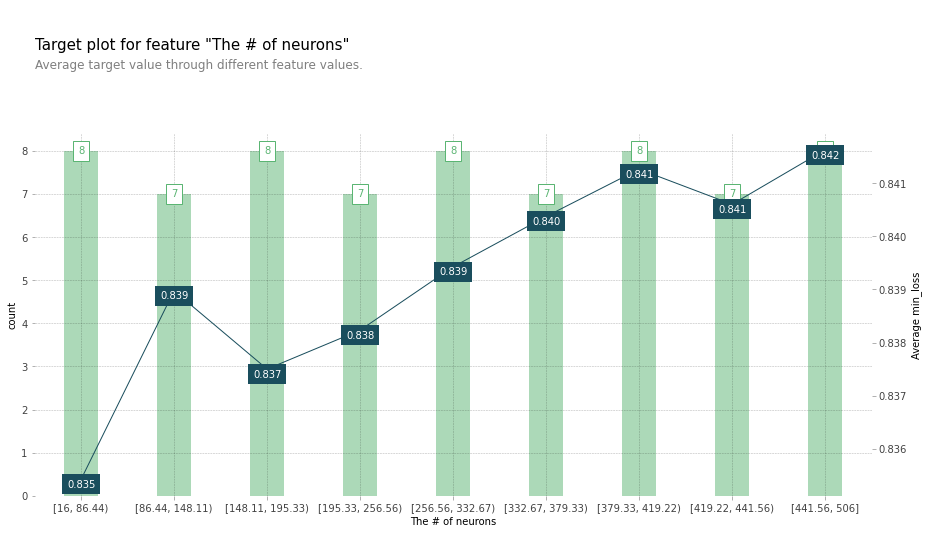

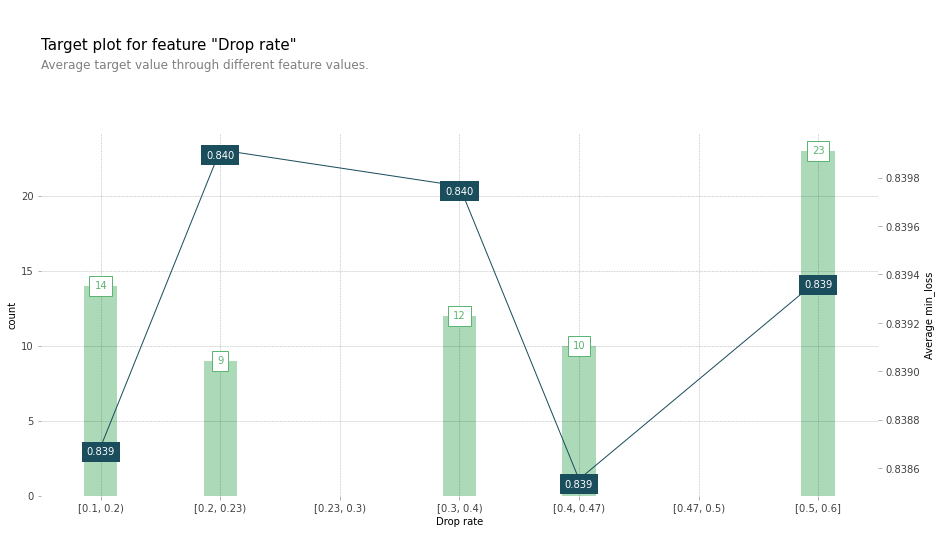

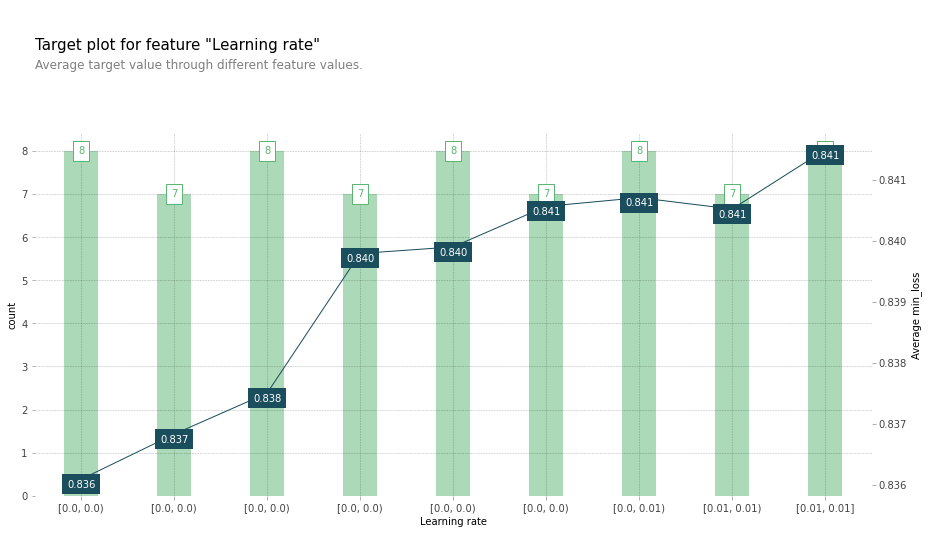

In [11]:
fig, axes, summary_df = info_plots.target_plot(
df = log_group.drop(['num_fold'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = log_group.drop(['num_fold'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    target = 'min_loss'
)

fig, axes, summary_df = info_plots.target_plot(
df = log_group.drop(['num_fold'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    target = 'min_loss'
)

## How will your model inference the relationship between parameters and loss results: The evidence from linear regression.

### **The case is "logs".**

- The values in box indicate the median loss of each interval when linear regression inferences the loss reulst with given parameters.

- In this analysis, we can find that each parameter affects the positive direction on output (loss result).

/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  s = str(s)
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

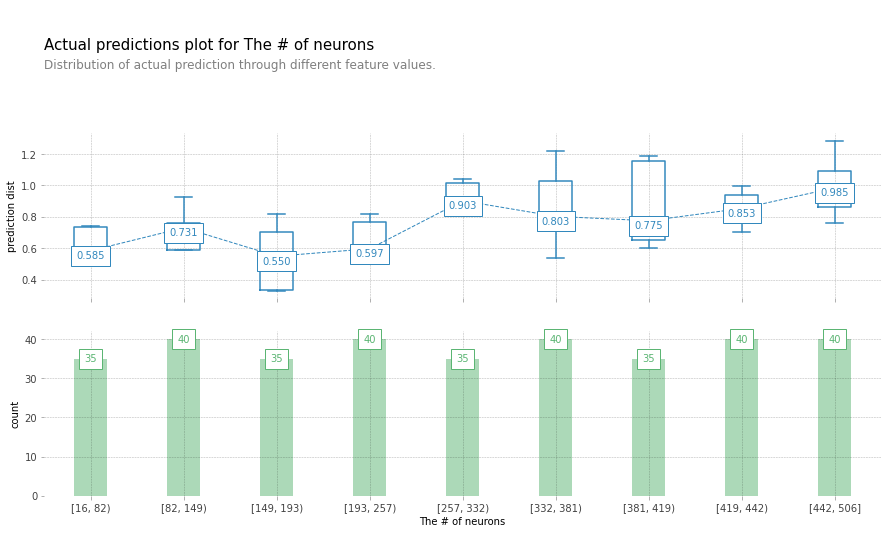

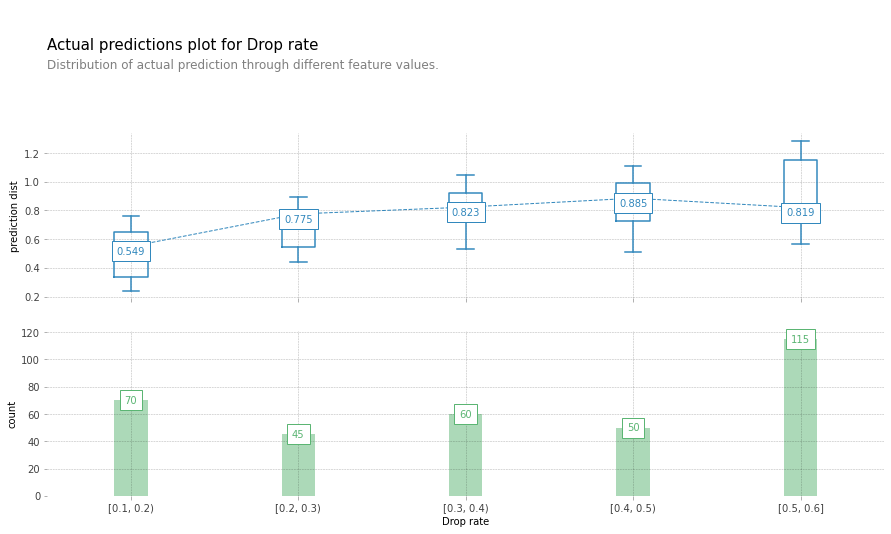

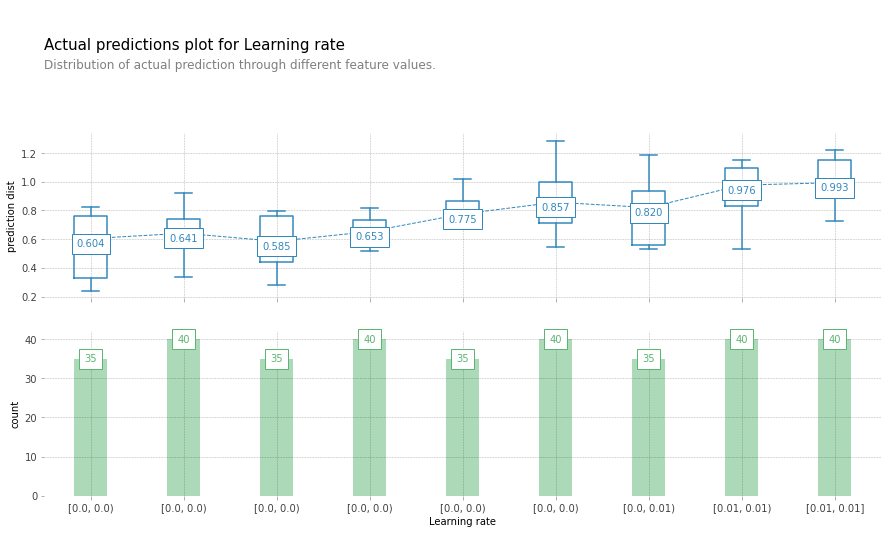

In [12]:
fig, axes, summary_df = info_plots.actual_plot(
    model = model1,
    X = logs.drop(['num_iter','num_fold','min_loss'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model1,
    X = logs.drop(['num_iter','num_fold','min_loss'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model1,
    X = logs.drop(['num_iter','num_fold','min_loss'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    predict_kwds = {}
)

## How will your model inference the relationship between parameters and loss results: The evidence from linear regression, ver 2.

### **The case is "log_group".**

- The values in box indicate the median loss of each interval when linear regression inferences the loss reulst with given parameters.

- In this analysis, we can find that each parameter affects the positive direction on output (loss result).

/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df['actual_prediction'] = prediction
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  s = str(s)
/usr/local/lib/python3.7/dist-packages/pdpbox/info_plots.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

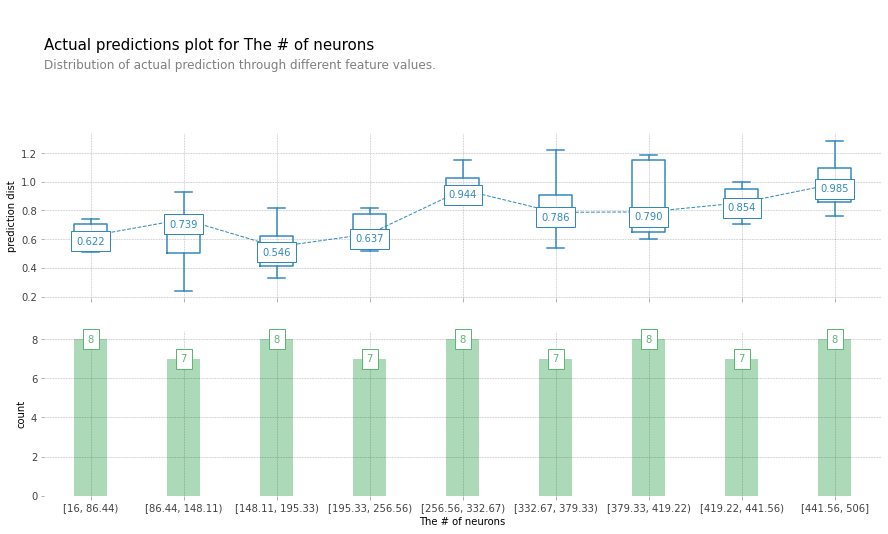

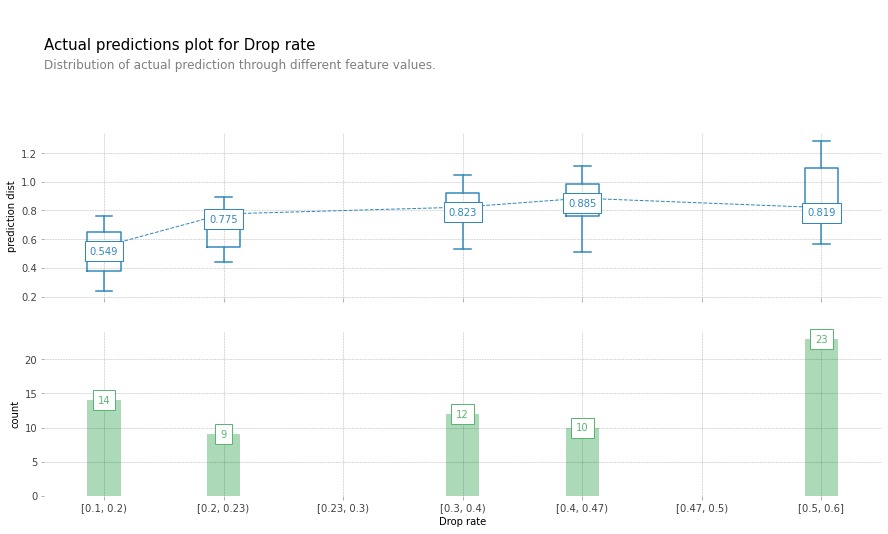

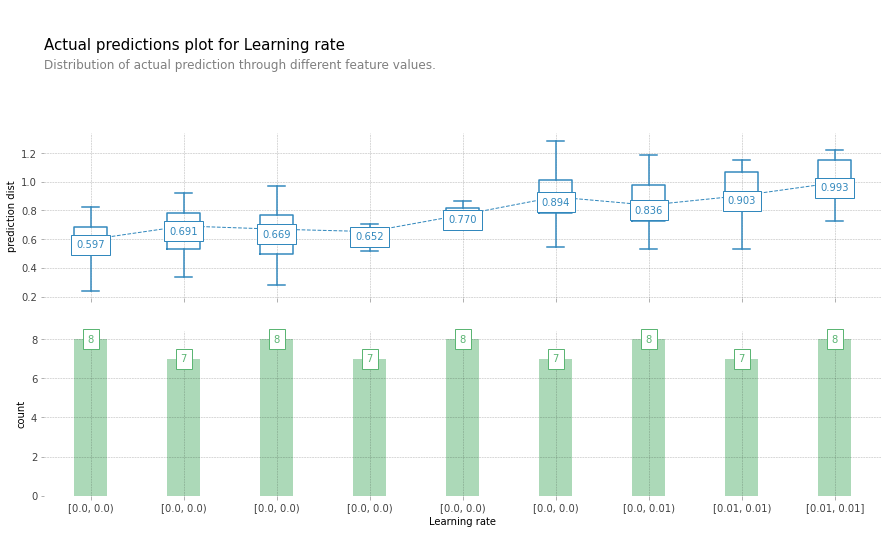

In [13]:
fig, axes, summary_df = info_plots.actual_plot(
    model = model2,
    X = log_group.drop(['num_fold','min_loss'],axis=1),
    feature = 'neurons',
    feature_name = 'The # of neurons',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model2,
    X = log_group.drop(['num_fold','min_loss'],axis=1),
    feature = 'drop_rate',
    feature_name = 'Drop rate',
    predict_kwds = {}
)

fig, axes, summary_df = info_plots.actual_plot(
    model = model2,
    X = log_group.drop(['num_fold','min_loss'],axis=1),
    feature = 'lr_rate',
    feature_name = 'Learning rate',
    predict_kwds = {}
)

<a id="4"></a>
# Review

From my notebook, you can identify that a deep neural network will need a few neurons, dropout rate, and learning rate in this competition.

Of course, it didn't contain all the cases.

There are many deep neural networks, which may differ case by case a little bit.

But, if you use the sequential model with fully-connected, it might not be different as much as your model's complexity.

I hope that my short report will be helpful to you!!

It has done!!

If this notebook is helpful to you, give me upvotes!!

Thank you for viewing.